Number of clusters: 2
Number of noise points: 34
Silhouette Score: 0.35651648142700726


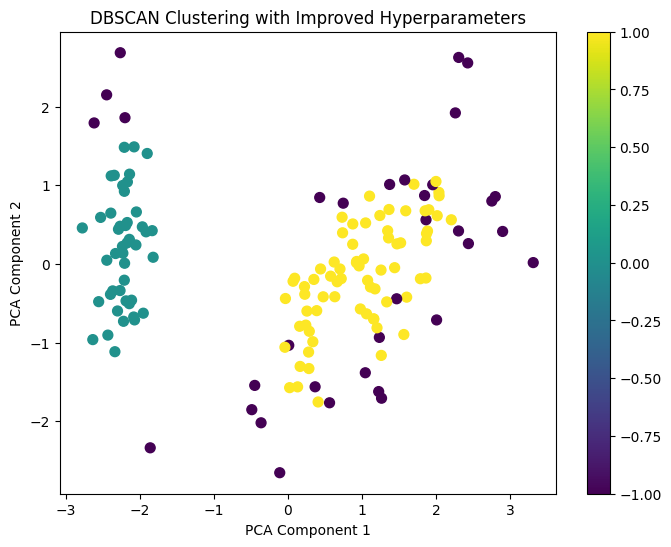

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

iris = load_iris()
X = iris.data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

print(f"Number of clusters: {len(set(labels)) - (1 if -1 in labels else 0)}")
print(f"Number of noise points: {list(labels).count(-1)}")

if len(set(labels)) > 1:
    score = silhouette_score(X_scaled, labels)
    print(f"Silhouette Score: {score}")
else:
    print("Silhouette Score: Cannot be calculated for a single cluster.")

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', marker='o', s=50)
plt.title('DBSCAN Clustering with Improved Hyperparameters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show()
